<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

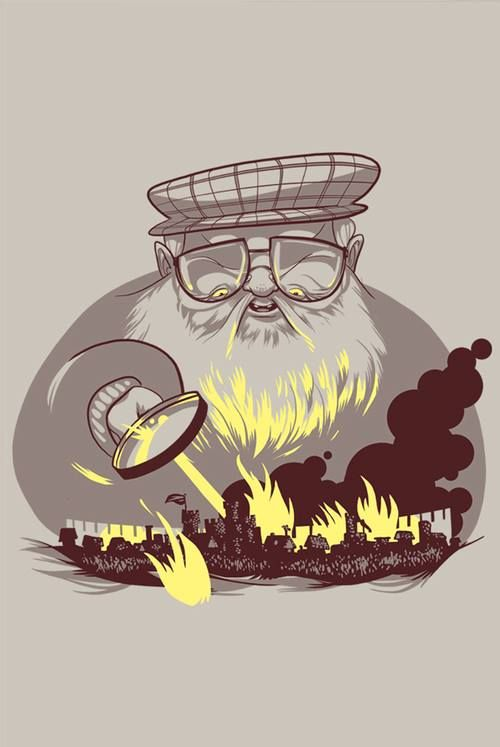

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [529]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 69.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 75.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [530]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [531]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [532]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [533]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Заменим пропуски в категориальных столбцах title, culture и isAliveSpouse на значение Unknown (для object) или -1 (для float). В дальнейшем, при One-hot кодировании модель не утратит эту информацию.

In [534]:
data.loc[data.title.isna(), 'title']  = 'Unknown'
data.loc[data.culture.isna(), 'culture']  = 'Unknown'
data.loc[data.isAliveSpouse.isna(), 'isAliveSpouse']  = -1





Удалим неинформативные столбцы, имеющие менее 50 значений:

In [535]:
data.drop(columns=['mother', 'father', 'heir', 'house', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'book1', 'book2',
       'book3', 'book4', 'book5'], inplace=True)

In [536]:
data[['dateOfBirth', 'age']].corr()

,dateOfBirth,age
dateOfBirth,1.000000,-0.504566
age,-0.504566,1.000000


Удалим столбец dateOfBirth, так как он коррелирует со столбцом age

In [537]:
data.drop(columns=['dateOfBirth'], inplace=True)

Заполним пропуски в столбце age медианным значением для пола персонажа

In [538]:
data.loc[(data['age'].isna()) & (data['male']==0), 'age'] = data.groupby(by='male').agg({'age': 'median'}).iloc[0,0]
data.loc[(data['age'].isna()) & (data['male']==1), 'age'] = data.groupby(by='male').agg({'age': 'median'}).iloc[1,0]

In [539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           1557 non-null   object 
 4   spouse            200 non-null    object 
 5   isAliveSpouse     1557 non-null   float64
 6   isMarried         1557 non-null   int64  
 7   isNoble           1557 non-null   int64  
 8   age               1557 non-null   float64
 9   numDeadRelations  1557 non-null   int64  
 10  popularity        1557 non-null   float64
 11  isAlive           1557 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 158.1+ KB


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [540]:
data['isPopular'] = data['popularity'].apply(lambda x: 0 if x< 0.5 else 1)

In [541]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 0 if x==0 else 1)

In [542]:
data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

In [543]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [544]:
def replace_culture(value):
    for key, values in cult.items():
        if value in values:
            return key
    return value


data['culture'] = data['culture'].apply(replace_culture)

In [545]:
data['culture'].unique()

array(['Unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'Westermen',
       'Westerman', 'Qarth', 'Lyseni', 'Qohor', 'Westeros', 'Norvoshi',
       'First Men', 'Meereenese', 'Andal', 'Astapori', 'ironborn',
       'Ghiscaricari', 'Braavos', 'Stormlands', 'Valemen', 'Myrish',
       'Lhazareen', 'Dornishmen', 'Sistermen', 'Northern mountain clans',
       'Andals', 'Vale', 'Crannogmen', 'Wildling', 'Dorne', 'Pentoshi',
       'Summer Islander', 'Westerlands', 'Summer Islands'], dtype=object)

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   spouse             200 non-null    object 
 5   isAliveSpouse      1557 non-null   float64
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                1557 non-null   float64
 9   isAlive            1557 non-null   int64  
 10  isPopular          1557 non-null   int64  
 11  boolDeadRelations  1557 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 158.1+ KB


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [547]:
import seaborn as sns

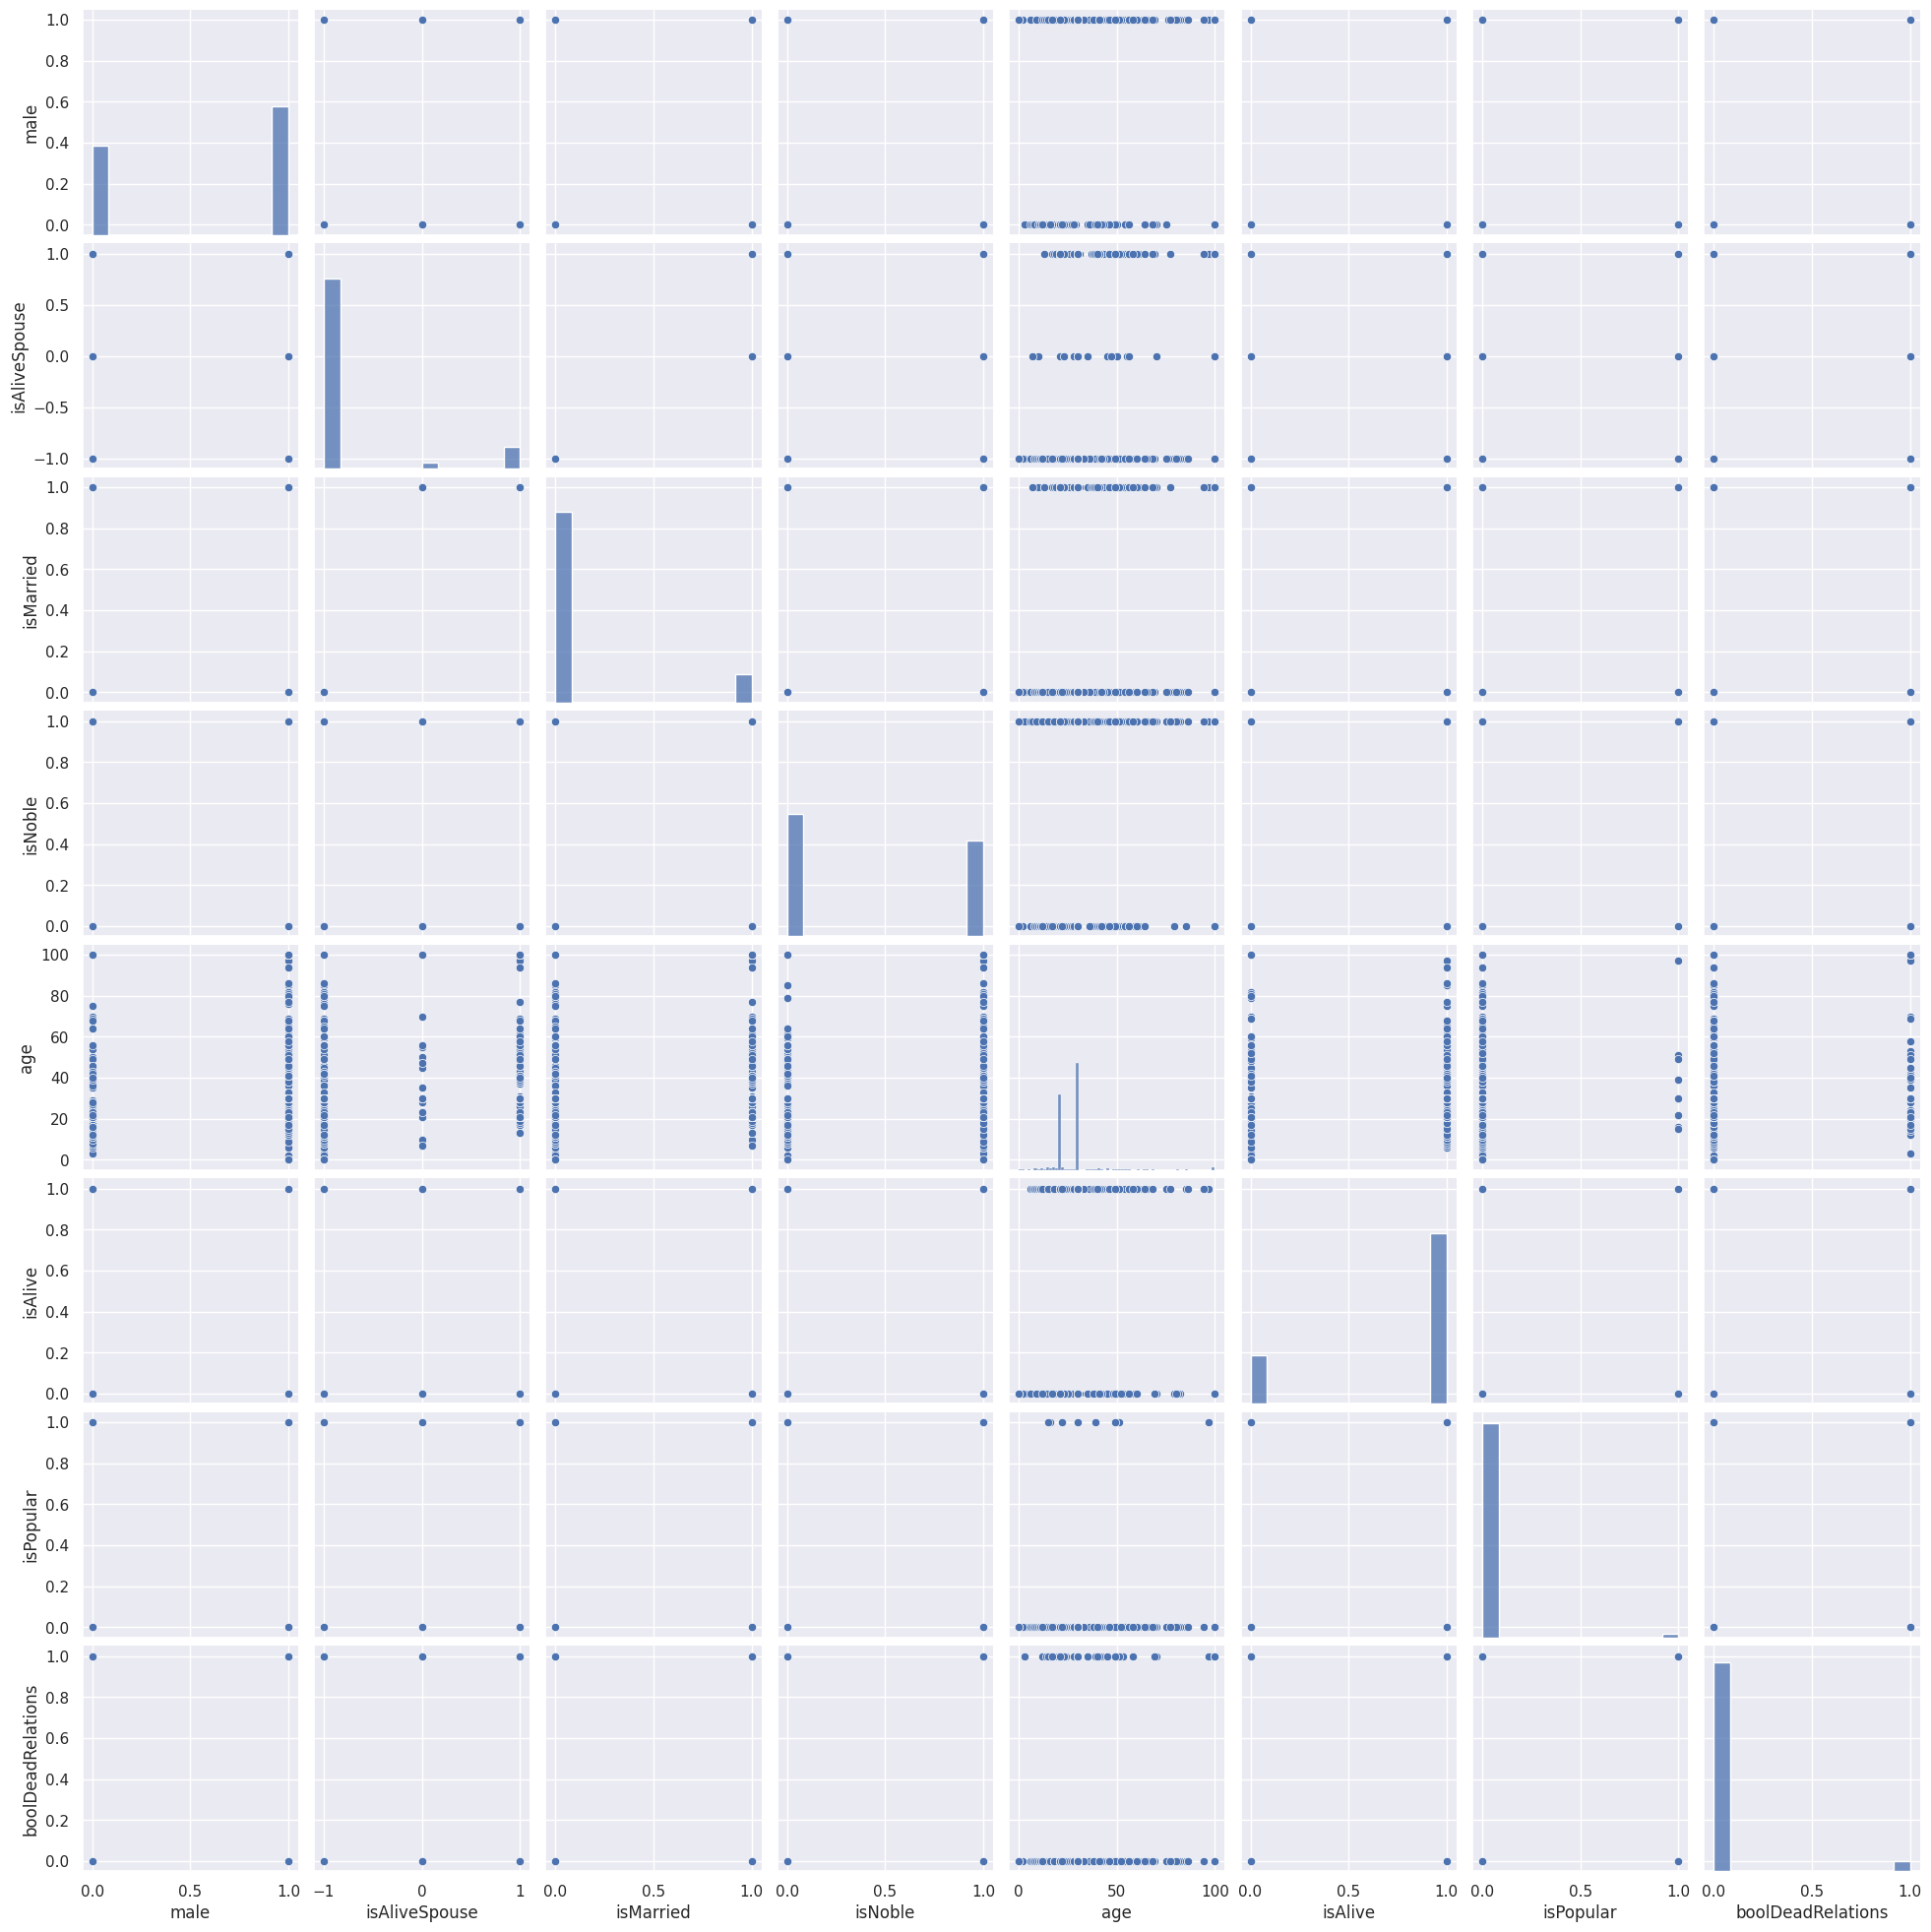

In [548]:
sns.pairplot(data)

In [549]:
data.columns

Index(['name', 'title', 'male', 'culture', 'spouse', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'isAlive', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

In [550]:
data[[ 'male',  #'book1', 'book2', 'book3', 'book4', 'book5',
      'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'isAlive',
       'isPopular', 'boolDeadRelations']].corr()

,male,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
male,1.000000,-0.066823,-0.094385,0.133807,0.343157,-0.148290,0.080518,0.039540
isAliveSpouse,-0.066823,1.000000,0.971557,0.133782,0.133870,-0.036813,0.022283,0.172811
isMarried,-0.094385,0.971557,1.000000,0.132037,0.133830,-0.049381,0.022525,0.197150
isNoble,0.133807,0.133782,0.132037,1.000000,0.184453,-0.060572,-0.038279,0.054631
age,0.343157,0.133870,0.133830,0.184453,1.000000,-0.211180,0.047207,0.108177
isAlive,-0.148290,-0.036813,-0.049381,-0.060572,-0.211180,1.000000,-0.118673,-0.178177
isPopular,0.080518,0.022283,0.022525,-0.038279,0.047207,-0.118673,1.000000,0.545175
boolDeadRelations,0.039540,0.172811,0.197150,0.054631,0.108177,-0.178177,0.545175,1.000000


<Axes: >

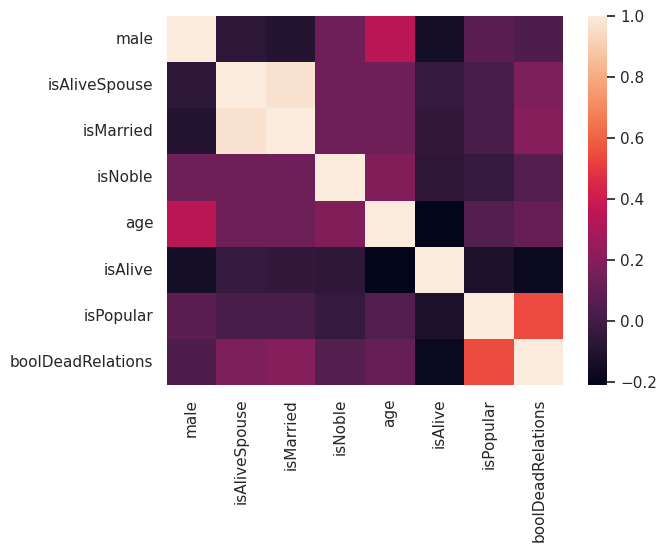

In [551]:
sns.heatmap(data[[ 'male', #'book1', 'book2', 'book3', 'book4','book5',
                  'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'isAlive',
       'isPopular', 'boolDeadRelations']].corr())

<Axes: >

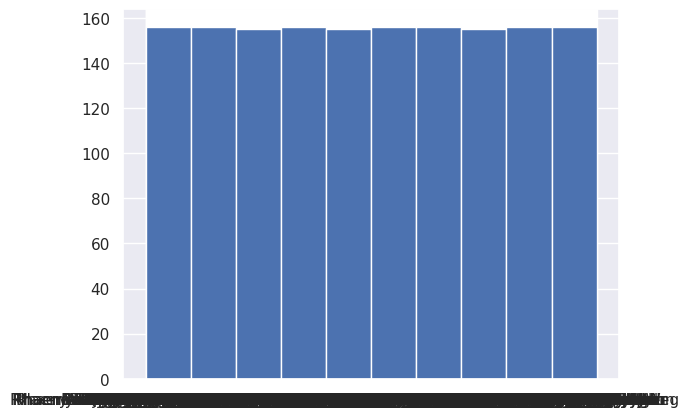

In [552]:
data.name.hist()

Удалим столбец name, содержащий уникаьные значения и столбцы, имеющие корреляцию с другими столбцами

In [553]:
data.drop(columns=['name', 'spouse', 'boolDeadRelations', 'isPopular',
       'isAliveSpouse', 'isMarried', 'isNoble'], inplace = True)

In [554]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    1557 non-null   object 
 1   male     1557 non-null   int64  
 2   culture  1557 non-null   object 
 3   age      1557 non-null   float64
 4   isAlive  1557 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 73.0+ KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [555]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Датасет несбалансирован по классам

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [556]:
data.describe()

,male,age,isAlive
count,1557.000000,1557.000000,1557.000000
mean,0.590880,27.953757,0.778420
std,0.491829,12.328168,0.415443
min,0.000000,0.000000,0.000000
25%,0.000000,21.000000,1.000000
50%,1.000000,30.000000,1.000000
75%,1.000000,30.000000,1.000000
max,1.000000,100.000000,1.000000


In [557]:
numerict_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerict_features

['male', 'age', 'isAlive']

In [558]:
data[numerict_features].corr()

,male,age,isAlive
male,1.000000,0.343157,-0.14829
age,0.343157,1.000000,-0.21118
isAlive,-0.148290,-0.211180,1.00000


<Axes: >

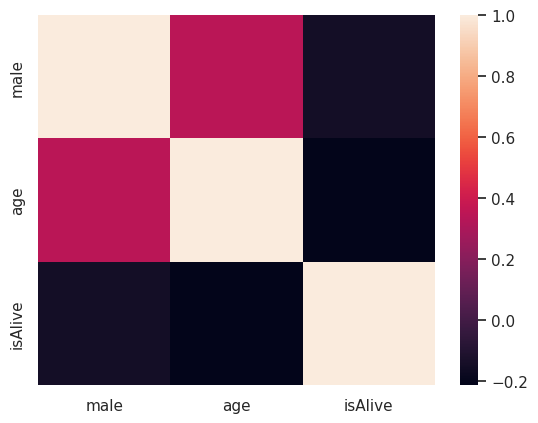

In [559]:
sns.heatmap(data[numerict_features].corr())

Корреляция между количественными признаками отсутствует

In [560]:
from sklearn.preprocessing import OneHotEncoder


In [561]:
unprocessed_cat_features = data.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture']

In [562]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

In [563]:
one_hot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [564]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)
one_hot_df

,title_Acorn Hall,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,...,culture_Vale,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_ironborn
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [565]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,male,age,isAlive,title_Acorn Hall,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,...,culture_Vale,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_ironborn
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,97.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,30.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,29.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,30.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,21.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

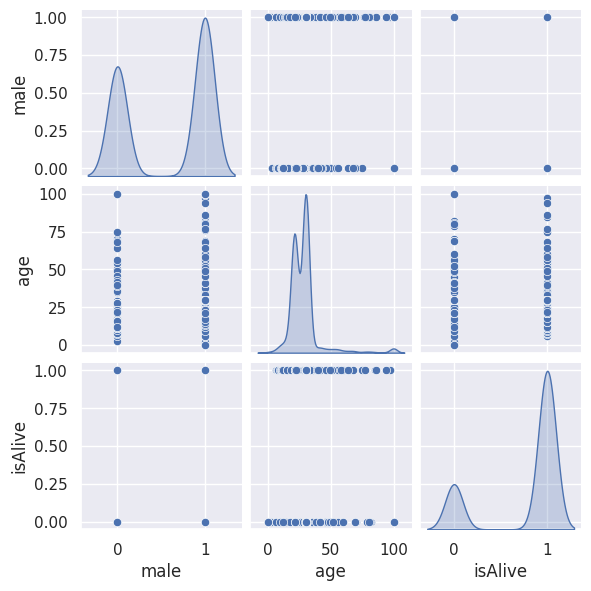

In [566]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [567]:
X = df_encoded.drop(columns=['isAlive'])
y = df_encoded['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [568]:
from sklearn.model_selection import train_test_split

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [570]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [571]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [572]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
lr_y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [573]:
# Шаг 1. создание модели
adaboost = AdaBoostClassifier()
randomforest = RandomForestClassifier()
gaussian = GaussianProcessClassifier()
naive_bayes = GaussianNB()
knn =  KNeighborsClassifier()
svc= SVC()
tree = DecisionTreeClassifier()


# Шаг 2. обучение модели
adaboost.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
gaussian.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)



# Шаг 3. Предсказание на тестовых данных
adaboost_y_pred = adaboost.predict(X_test)
randomforest_y_pred = randomforest.predict(X_test)
gaussian_y_pred = gaussian.predict(X_test)
naive_bayes_y_pred = naive_bayes.predict(X_test)
knn_y_pred = knn.predict(X_test)
svc_y_pred = svc.predict(X_test)
tree_y_pred = tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [574]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [575]:
# Шаг 3. Предсказание на тестовых данных
lr_y_pred = logistic_regression.predict(X_test)
# Шаг 4. Оценка предсказания по метрике accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy logistic_regression : %.4f" % lr_accuracy)

Accuracy logistic_regression : 0.8205


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [576]:
# Шаг 3. Предсказание на тестовых данных
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
randomforest_accuracy = accuracy_score(y_test, randomforest_y_pred)
gaussian_accuracy = accuracy_score(y_test, gaussian_y_pred)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
# Шаг 4. Оценка предсказания по метрике accuracy

print("adaboost : %.4f" % adaboost_accuracy)
print("gaussian : %.4f" % gaussian_accuracy)
print("randomforest : %.4f" % randomforest_accuracy)
print("naive_bayes : %.4f" % naive_bayes_accuracy)
print("knn : %.4f" % knn_accuracy)
print("svc : %.4f" % svc_accuracy)
print("tree : %.4f" % tree_accuracy)

adaboost : 0.8128
gaussian : 0.8128
randomforest : 0.8154
naive_bayes : 0.2615
knn : 0.7923
svc : 0.8051
tree : 0.8103


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [577]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.6MB/s]


In [578]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [579]:
submission['isAlive'] =

SyntaxError: invalid syntax (<ipython-input-579-cfa4cc78704d>, line 1)

In [ ]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [ ]:
data_test.head()

Применим выполненную ранее предобраотку данных к тестовому датасету

In [ ]:
data_test.info()

In [ ]:
data_test.loc[data_test.title.isna(), 'title']  = 'Unknown'
data_test.loc[data_test.culture.isna(), 'culture']  = 'Unknown'
data_test.loc[data_test.isAliveSpouse.isna(), 'isAliveSpouse']  = -1

In [ ]:
data_test.drop(columns=['mother', 'father', 'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], inplace=True)

In [ ]:
submission['isAlive'] =

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)